**SETTING UP ENVIRONMENT**

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Target is one of the world’s most recognized brands and one of America’s leading retailers. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

This business case has information of 100k orders from 2016 to 2018 made at Target in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.



# Exploratory analysis

- Checking the structure & characteristics of the dataset
- Getting number of rows in the data
- Data type of columns in a table



In [2]:
customers=pd.read_csv("customers.csv")
geolocation=pd.read_csv("geolocation.csv")
order_items=pd.read_csv("order_items.csv")

orders=pd.read_csv("orders.csv")
payments=pd.read_csv("payments.csv")
products=pd.read_csv("products.csv")
sellers=pd.read_csv("sellers.csv")

#order_reviews=pd.read_csv("order_reviews.csv")

In [3]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [6]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [7]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [8]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [12]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
products

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
products[products.isna().any(axis=1)]

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [16]:

products.isnull().sum()/len(products) *100

product_id                    0.000000
product category              1.851234
product_name_length           1.851234
product_description_length    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [17]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [18]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [19]:
sellers[sellers.isnull().any(axis=1)]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


# DATA CLEANING AND EXPLORATION

- Number of null or missing values in a column


In [20]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [21]:
df=[customers,geolocation,order_items,orders,payments,products,sellers]

In [22]:
for i in df:
    print(missing_to_df(i))
    print()

                          Total  Percent
customer_state                0      0.0
customer_city                 0      0.0
customer_zip_code_prefix      0      0.0
customer_unique_id            0      0.0
customer_id                   0      0.0

                             Total  Percent
geolocation_state                0      0.0
geolocation_city                 0      0.0
geolocation_lng                  0      0.0
geolocation_lat                  0      0.0
geolocation_zip_code_prefix      0      0.0

                     Total  Percent
freight_value            0      0.0
price                    0      0.0
shipping_limit_date      0      0.0
seller_id                0      0.0
product_id               0      0.0
order_item_id            0      0.0
order_id                 0      0.0

                               Total   Percent
order_delivered_customer_date   2965  2.981668
order_delivered_carrier_date    1783  1.793023
order_approved_at                160  0.160899
order_estim

 **Inference**
 - For orders and products table we have some missing values.
 
 
# Time period

In [23]:
time_table=[order_items,orders]

In [24]:
for i in time_table:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status        

In [25]:
order_items['shipping_limit_date'].nunique()

93318

In [26]:
order_items['shipping_limit_date'].unique()

array(['2017-09-19 09:45:35', '2017-05-03 11:05:13',
       '2018-01-18 14:48:30', ..., '2017-10-30 17:14:25',
       '2017-08-21 00:04:32', '2018-06-12 17:10:13'], dtype=object)

In [27]:
orders_date_cols=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']

In [28]:
for i in orders_date_cols:
    print(i, " - ",orders[i].nunique())

order_purchase_timestamp  -  98875
order_approved_at  -  90733
order_delivered_carrier_date  -  81018
order_delivered_customer_date  -  95664


In [29]:
for i in orders_date_cols:
    print(i, " - ",orders[i].unique())

order_purchase_timestamp  -  ['2017-10-02 10:56:33' '2018-07-24 20:41:37' '2018-08-08 08:38:49' ...
 '2017-08-27 14:46:43' '2018-01-08 21:28:27' '2018-03-08 20:57:30']
order_approved_at  -  ['2017-10-02 11:07:15' '2018-07-26 03:24:27' '2018-08-08 08:55:23' ...
 '2017-08-27 15:04:16' '2018-01-08 21:36:21' '2018-03-09 11:20:28']
order_delivered_carrier_date  -  ['2017-10-04 19:55:00' '2018-07-26 14:31:00' '2018-08-08 13:50:00' ...
 '2017-08-28 20:52:26' '2018-01-12 15:35:03' '2018-03-09 22:11:59']
order_delivered_customer_date  -  ['2017-10-10 21:25:13' '2018-08-07 15:27:45' '2018-08-17 18:06:29' ...
 '2017-09-21 11:24:17' '2018-01-25 23:32:54' '2018-03-16 13:08:30']


 **Inference**
 
- According to Date-Time columns the data is for period for between 2017-2018

# Conversion of date-time columns to datetime datatype 



In [30]:
# update data type of date columns to datetime
order_items['shipping_limit_date']= pd.to_datetime(order_items.shipping_limit_date)


In [31]:
orders['order_purchase_timestamp']= pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at']= pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date']= pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date']= pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date']= pd.to_datetime(orders.order_estimated_delivery_date)

# Cities Information 

In [32]:
customers['customer_city'].nunique()

4119

In [33]:
customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [34]:
geolocation['geolocation_city'].nunique()

8011

In [35]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [36]:
sellers['seller_city'].nunique()

611

In [37]:
sellers['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

 **Inference**
 
 - We have customer from around 4119 cities and sellers from 611 cities.

 - However we have geo information available for 8011 cities
 
 # States

In [38]:
sellers['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

In [39]:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [40]:
geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [41]:
sellers['seller_state'].nunique()

23

In [42]:
customers['customer_state'].nunique()

27

In [43]:
geolocation['geolocation_state'].nunique()

27

 **Inference**
 
 - We have customers from 27 states.
 - We have geo information available for 27 states.
 - However sellers are from only 27 states
 
# In-depth Exploration
 
 - Orders 

In [44]:
orders['order_status'].nunique()

8

In [45]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [46]:
orders.groupby(['order_status']).count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


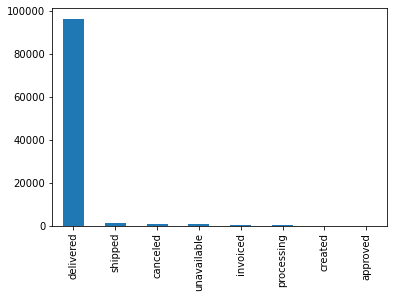

In [47]:
orders['order_status'].value_counts().plot.bar()

 **Inference**
  
  - We have most of orders corresponding to order_status delivered.


 

In [48]:
order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [50]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [51]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,37e9481cdd40609c76b3f6da7f9af51e,d9b26a5ba9f3034d33903344390460b9,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Baseline Numbers**


In [52]:
# customer count

len(orders.customer_id.unique())

99441

In [53]:
# average revenue per customer

payments['payment_value'].mean()

154.10038041698365

In [54]:
# average order_count per customer in the first 6 months

order_items["order_item_id"].mean()

1.1978339991122948

In [55]:
# What is the median?
order_items.order_item_id.median()

1.0

In [56]:
customer_count_by_order_count = orders.groupby('order_status').count().customer_id
customer_count_by_order_count

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

In [57]:
# percentage of customers whose orders delivered
96478 / len(orders.customer_id.unique())

0.9702034372140264

**Customer Date Patterns**

- Feature Extraction: Through order_purchase_timestamp in “orders” dataset 

In [58]:
orders['month_of_date']=orders['order_purchase_timestamp'].dt.month
orders['year_of_date']=orders['order_purchase_timestamp'].dt.year
orders['day_of_date']=orders['order_purchase_timestamp'].dt.day
orders['date_of_date_purchase']=orders['order_purchase_timestamp'].dt.date
orders['dayofweek_of_date_purchase']=orders['order_purchase_timestamp'].dt.dayofweek

orders['hour_of_date_purchase']=orders['order_purchase_timestamp'].dt.hour
orders['time_of_date_purchase']=orders['order_purchase_timestamp'].dt.time


#orders['dayofweek_name_of_date_purchase']=orders['order_purchase_timestamp'].dt.day_of_week
#df['month_of_date'] = df['date_given'].dt.month

In [59]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_of_date,year_of_date,day_of_date,date_of_date_purchase,dayofweek_of_date_purchase,hour_of_date_purchase,time_of_date_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017,2,2017-10-02,0,10,10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7,2018,24,2018-07-24,1,20,20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018,8,2018-08-08,2,8,08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11,2017,18,2017-11-18,5,19,19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,2018,13,2018-02-13,1,21,21:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,3,2017,9,2017-03-09,3,9,09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2,2018,6,2018-02-06,1,12,12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,8,2017,27,2017-08-27,6,14,14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,2018,8,2018-01-08,0,21,21:28:27


In [60]:
# First valuable to look at is the month the customer became active

new_customers_by_month = orders.groupby('month_of_date').count().customer_id

new_customers_by_month

month_of_date
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: customer_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

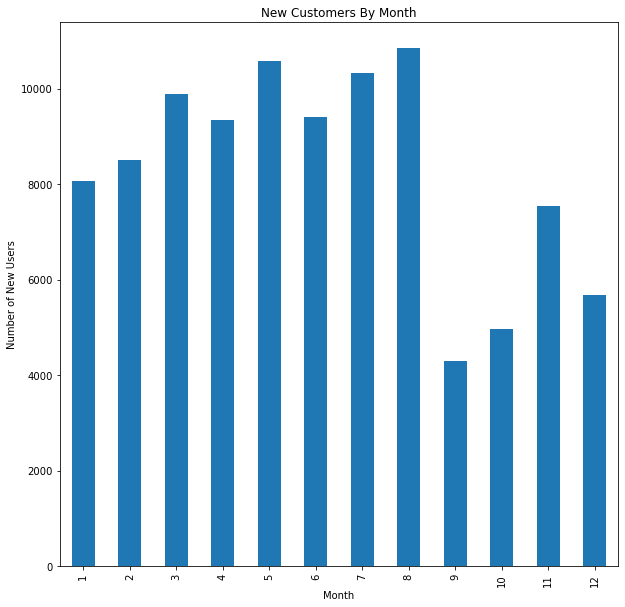

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_month.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of New Users')

In [62]:
# What date range do we have here for first order (the day the customer converted for the first tim)e?

orders.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [63]:
# Last conversion in data set

orders.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [64]:
# To have a better sense, perhaps we should add the year


new_customers_by_month_year = orders.groupby(['year_of_date','month_of_date']).count().customer_id
new_customers_by_month_year

year_of_date  month_of_date
2016          9                   4
              10                324
              12                  1
2017          1                 800
              2                1780
              3                2682
              4                2404
              5                3700
              6                3245
              7                4026
              8                4331
              9                4285
              10               4631
              11               7544
              12               5673
2018          1                7269
              2                6728
              3                7211
              4                6939
              5                6873
              6                6167
              7                6292
              8                6512
              9                  16
              10                  4
Name: customer_id, dtype: int64

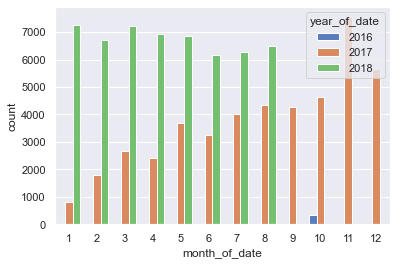

In [65]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_of_date", hue = "year_of_date", data=orders, palette = "muted")

# Oh Oh! In 2017, new users per month continued to go up but it seems to be stalling in last months of 2018.

In [66]:
# is average number of new customers increasing per year

new_customers_by_year = orders.groupby('year_of_date').count().customer_id
new_customers_by_year

year_of_date
2016      329
2017    45101
2018    54011
Name: customer_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

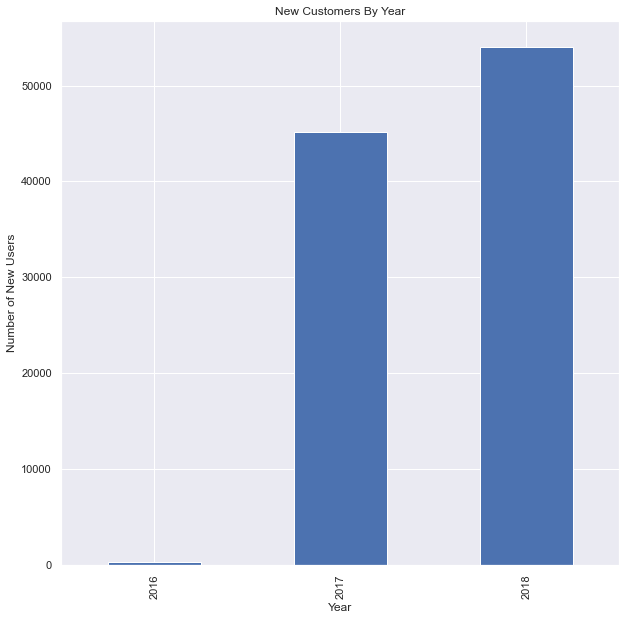

In [67]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_year.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Users')


# Good news! Even though we don't have all the data for the last 3 months of 2018. The total number of new users for January - October 10 is already higher than all of 2017




In [68]:
# Another valuable to look at is the day of the week the customer became active

new_customers_by_dayofweek = orders.groupby('dayofweek_of_date_purchase').count().customer_id

new_customers_by_dayofweek

dayofweek_of_date_purchase
0    16196
1    15963
2    15552
3    14761
4    14122
5    10887
6    11960
Name: customer_id, dtype: int64

In [69]:
# Another valuable to look at is the hour of the day the customer became active

new_customers_by_hour_of_date_purchase = orders.groupby('hour_of_date_purchase').count().customer_id

new_customers_by_hour_of_date_purchase

hour_of_date_purchase
0     2394
1     1170
2      510
3      272
4      206
5      188
6      502
7     1231
8     2967
9     4785
10    6177
11    6578
12    5995
13    6518
14    6569
15    6454
16    6675
17    6150
18    5769
19    5982
20    6193
21    6217
22    5816
23    4123
Name: customer_id, dtype: int64

In [70]:
# Another valuable to look at is the time of the dat the customer became active

new_customers_by_hour_of_date_purchase = orders.groupby('time_of_date_purchase').count().customer_id

new_customers_by_hour_of_date_purchase

time_of_date_purchase
00:00:00    1
00:00:01    2
00:00:02    1
00:00:06    1
00:00:07    1
           ..
23:59:53    1
23:59:54    4
23:59:55    1
23:59:58    2
23:59:59    1
Name: customer_id, Length: 50818, dtype: int64

 
**Conclusions**
 
 - There a **growing trend on e-commerce** in Brazil and is increasingly yearly with good performance.

 - It seems on Monday most brazilians customers tend to do online purchasing.

 - Most Brazilian customers tend to buy in Afternoon.



# Evolution of E-commerce orders in the Brazil region

Get month on month orders by region

Total of customer orders by state

Top 10 brazilian cities most no. of orders

How are customers distributed in Brazil

City wise number of unique customers


In [71]:
# First valuable to look at is the month the customer became active

new_customers_by_month = orders.groupby('month_of_date').count().customer_id

new_customers_by_month

month_of_date
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: customer_id, dtype: int64

 - Total of customer orders by state



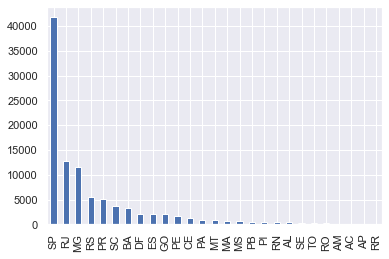

In [72]:
customers['customer_state'].value_counts().plot.bar()

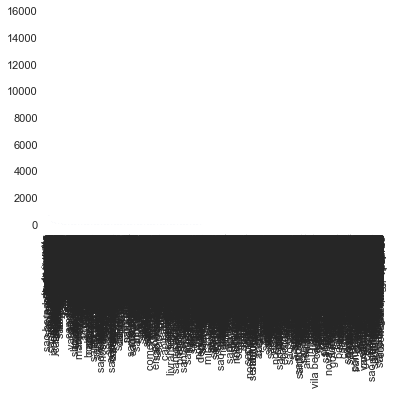

In [73]:
customers['customer_city'].value_counts().plot.bar()

# DATABASE

**Table Creation and Data Load Queries SQL SCRIPT**

CREATE TABLE customers (
	customer_id varchar (50) NOT NULL PRIMARY KEY,
	customer_unique_id varchar(50),
	customer_zip_code int,
	customer_city varchar (50),
	customer_state varchar (50)
	)
	
SELECT * FROM customers;

COPY customers (customer_id, customer_unique_id, customer_zip_code, customer_city, customer_state)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_customers_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM customers;


DROP TABLE geolocation

CREATE TABLE geolocation
	(geolocation_zip_code_prefix int,
	 geolocation_lat float,
	 geolocation_Ing float,
	 geolocation_city varchar (50),
	 geolocation_state varchar (10)
	)
	
SELECT * FROM geolocation;

COPY geolocation (geolocation_zip_code_prefix, geolocation_lat, geolocation_Ing, geolocation_city, geolocation_state)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_geolocation_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM geolocation;

CREATE TABLE order_items (
	order_id varchar NOT NULL,
	order_item_id varchar (50),
	product_id varchar (50),
	seller_id varchar (50),
	shipping_limit_date timestamp,
	price float,
	freight_value float) 
	
SELECT * FROM order_items;

COPY order_items (order_id, order_item_id, product_id, seller_id, shipping_limit_date, price,freight_value)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_order_items_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM order_items;

CREATE TABLE order_payments (
	order_id varchar(50), 
	payment_sequential int, 
	payment_type varchar (50), 
	payment_installments int, 
	payment_value float)
	
SELECT * FROM order_payments

COPY order_payments (order_id, payment_sequential, payment_type, payment_installments, payment_value)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_order_payments_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM order_payments;

CREATE TABLE orders (
	order_id VARCHAR(100) PRIMARY KEY,
	customer_id VARCHAR(100),
	order_status VARCHAR(50),
	order_purchase_timestamp TIMESTAMP,
	order_approved_at TIMESTAMP,
	order_delivered_carrier_date TIMESTAMP,
	order_delivered_customer_date TIMESTAMP,
	order_estimated_delivery_date TIMESTAMP
	) 

SELECT * FROM orders;

COPY orders (order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,order_estimated_delivery_date)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_orders_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM orders;

CREATE TABLE products (
	product_id varchar(50) NOT NULL PRIMARY KEY,
	product_category_name VARCHAR(70),
	product_name_length int ,
	product_description_length int,
	product_photos_qty int,
	product_weight_g int ,
	product_length_cm int ,
	product_height_cm int ,
	product_width_cm int ) 

SELECT * FROM products;

COPY products (product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_products_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM products;

CREATE TABLE sellers
	(seller_id varchar(50) NOT NULL PRIMARY KEY,
	seller_zip_code_prefix int,
	seller_city varchar (100) ,
	seller_state varchar(15)
	)

SELECT * FROM sellers

COPY sellers (seller_id, seller_zip_code_prefix, seller_city, seller_state)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_sellers_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM sellers


CREATE TABLE reviews
	 (review_id varchar (50) NOT NULL,
	 order_id varchar (50), 
	 review_score int, 
	 review_comment_title varchar (50), 
	 review_comment_message varchar (500), 
	 review_creation_date timestamp, 
	 review_answer_timestamp timestamp)

SELECT * FROM reviews;

COPY reviews (review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp)
FROM 'C:\Program Files\PostgreSQL\11\data\olist\olist_order_reviews_dataset.csv' DELIMITER ',' CSV HEADER;

SELECT * FROM reviews;


# Data Description
- In the schematic diagram explaining the database connectivity, you’ll find eight tables. The description of these tables is as follows: -

- 1) olist_orders_dataset: This table is connected to 4 other tables. It is used to connect all the details related to an order.
- 2) olist_order_items_dataset: It contains the details of an item that had been purchased such as shipping date, price and so on.
- 3) olist_order_reviews_dataset: It contains details related to any reviews posted by the customer on a particular product that he had purchased.
- 4) olist_products_dataset: It contains related to a product such as the ID, category name and measurements.
- 5) olist_order_payments_dataset: The information contained in this table is related to the payment details associated with a particular order.
- 6) olist_customers_dataset: Details the customer base information of this firm.
- 7) olist_geolocation_dataset: It contains geographical information related to both the sellers and customers.
- 8) olist_sellers_dataset: This table contains the information related to all the sellers who have registered with this firm.

Further Analysis done through sql queries in database

Please Find below Link of word doc containing queries and snaps - 

https://docs.google.com/document/d/1x7O1zLXihv-qdRY1fvRXacI5rIGUsdAZ/edit?usp=sharing&ouid=113633860454014340009&rtpof=true&sd=true

# CONCLUSIONS

**Basic data analysis**
- We are given multiple tables and a schema depicting how these tables are connected. 
- Furniture decor, beauty products and sports equipment are the most popular categories as per the sales records. 
- It is known that customers spend around 125 Brazilian real on average for purchasing the products from this website. 
- On analyzing the state-wise distribution of the customers, we can see that the majority of the orders had been placed by customers located in Sao Paulo. 
- The freight cost on most of the items was reasonable. 
- This can be a reason why many were satisfied with the product overall. The majority of the transactions took place using credit cards.


- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced by the names of Game of Thrones great houses.


- This is a  ecommerce public dataset of orders. 
- The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 
- There is a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
